In [1]:
from preprocessing import load_data
from GCN import NodeClassificationGCN
import torch
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = load_data("./data/", "cora")

Loading cora dataset...
-> Dataset loaded successfully!
Adjacency shape: torch.Size([2708, 2708])
Feature shape: torch.Size([2708, 1433])
Number of classes: 7
Train/Val/Test split: 140 300 1000


In [3]:
model = NodeClassificationGCN(features.shape[1], 256, np.max(labels.detach().numpy())+1)

In [4]:
def accuracy(out,label):
    oneHotCodded = out.max(1)[1].type_as(label)
    return oneHotCodded.eq(label).double().sum()/len(label)

In [5]:
import torch.optim as optim
import torch.nn.functional as F

epochs=100
optimizer = optim.Adam(model.parameters(),lr=0.01)
train_losses=[]
val_losses=[]
train_accuracy=[]
val_accuracy=[]
for epoch in range(epochs):
    model.train()
    train_labels=labels[idx_train]
    val_labels=labels[idx_val]
    
    
    optimizer.zero_grad()
    output = model(features, adj)
    train_loss=F.nll_loss(output[idx_train],train_labels)
    train_losses.append(train_loss)
    t_a=accuracy(output[idx_train],train_labels)
    train_accuracy.append(t_a)
    print(f"Training epoch {epoch} ; accuracy: {accuracy(output[idx_train],train_labels)}; loss: {train_loss.item()}")
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    output = model(features, adj)
    val_loss=F.nll_loss(output[idx_val],val_labels)
    val_losses.append(val_loss)
    v_a=accuracy(output[idx_val],val_labels)
    val_accuracy.append(v_a)
    print(f"Validation epoch {epoch} ; accuracy: {accuracy(output[idx_val],val_labels)}; loss: {val_loss.item()}")
    

Training epoch 0 ; accuracy: 0.11428571428571428; loss: 1.9461206197738647
Validation epoch 0 ; accuracy: 0.6366666666666667; loss: 1.9090656042099
Training epoch 1 ; accuracy: 0.7142857142857143; loss: 1.8925902843475342
Validation epoch 1 ; accuracy: 0.6866666666666666; loss: 1.8471697568893433
Training epoch 2 ; accuracy: 0.7857142857142857; loss: 1.810901165008545
Validation epoch 2 ; accuracy: 0.6966666666666667; loss: 1.7712249755859375
Training epoch 3 ; accuracy: 0.8071428571428572; loss: 1.7147706747055054
Validation epoch 3 ; accuracy: 0.7033333333333334; loss: 1.687929630279541
Training epoch 4 ; accuracy: 0.8; loss: 1.6083697080612183
Validation epoch 4 ; accuracy: 0.7133333333333334; loss: 1.6015782356262207
Training epoch 5 ; accuracy: 0.8071428571428572; loss: 1.498189926147461
Validation epoch 5 ; accuracy: 0.7266666666666667; loss: 1.5132108926773071
Training epoch 6 ; accuracy: 0.8214285714285714; loss: 1.3824266195297241
Validation epoch 6 ; accuracy: 0.7333333333333

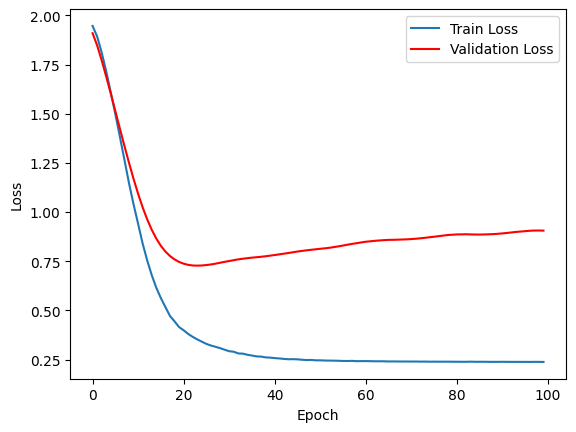

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert tensors to float for plotting
train_losses_float = [float(train_loss.cpu().detach().numpy()) for train_loss in train_losses]
train_loss_indices = [i for i, _ in enumerate(train_losses_float)]

sns.lineplot(x=train_loss_indices, y=train_losses_float, label='Train Loss')

val_losses_float = [float(val_loss.cpu().detach().numpy()) for val_loss in val_losses]
val_loss_indices = [i for i, _ in enumerate(val_losses_float)]

sns.lineplot(x=val_loss_indices, y=val_losses_float, color='r', label='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [7]:
t_a = t_a.cpu().detach().numpy()
v_a = v_a.cpu().detach().numpy()

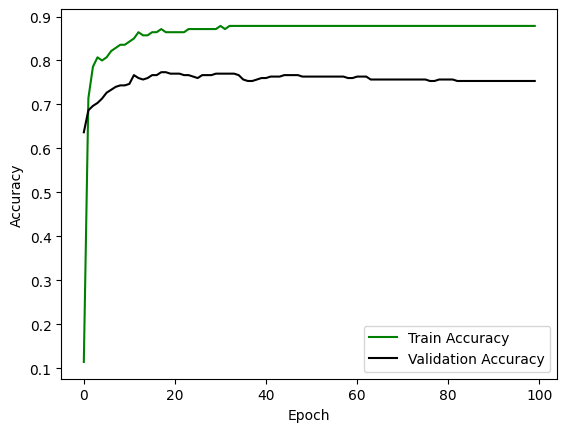

In [8]:
# Convert train accuracy tensors to float
train_accuracy_float = [float(t_a.cpu().detach().numpy()) for t_a in train_accuracy]
t_a_indices = [i for i, _ in enumerate(train_accuracy_float)]

sns.lineplot(x=t_a_indices, y=train_accuracy_float, color='green', label='Train Accuracy')

# Convert validation accuracy tensors to float
val_accuracy_float = [float(v_a.cpu().detach().numpy()) for v_a in val_accuracy]
v_a_indices = [i for i, _ in enumerate(val_accuracy_float)]

sns.lineplot(x=v_a_indices, y=val_accuracy_float, color='black', label='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
test_losses=[]
model.eval()
test_labels=labels[idx_test]
output = model(features, adj)
loss=F.nll_loss(output[idx_test],test_labels)
test_losses.append(loss)
print(f"Test set ; accuracy: {accuracy(output[idx_test],test_labels)}; loss: {loss.item()}")

Test set ; accuracy: 0.723; loss: 0.8688830733299255


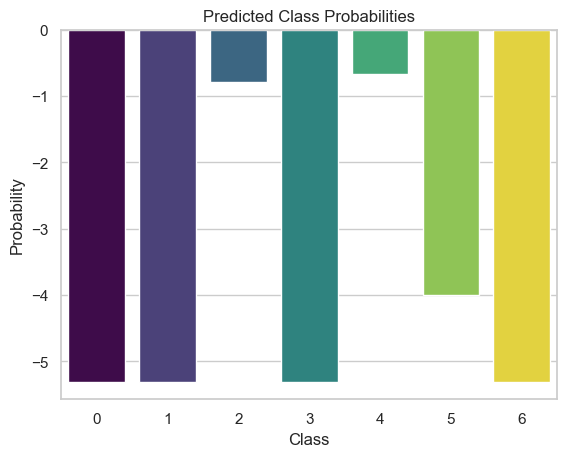

In [10]:
sample = 500
sns.set_theme(style="whitegrid")

pred = model(features, adj)
probs = pred[sample].detach().cpu().numpy()

sns.barplot(x=np.arange(len(probs)), y=probs, hue=np.arange(len(probs)), palette="viridis", legend=False)

plt.xlabel("Class")
plt.ylabel("Probability")
plt.title(f"Predicted Class Probabilities")
plt.show()

In [11]:
output_idx_test=output[idx_test]

In [12]:
df_output_idx_test=pd.DataFrame(output_idx_test.detach().numpy())
df_output_idx_test

,0,1,2,3,4,5,6
0,-5.304836,-5.304836,-0.792280,-5.304836,-0.675294,-4.000202,-5.304836
1,-5.013274,-5.013274,-3.793787,-5.013274,-3.522688,-0.081890,-5.013274
2,-7.396692,-7.396692,-7.396692,-7.396692,-0.020049,-4.087392,-7.396692
3,-5.834529,-5.834529,-4.187965,-5.834529,-5.109225,-0.033471,-5.834529
4,-5.116476,-5.658492,-4.274814,-5.534878,-0.035152,-5.597530,-5.658492
...,...,...,...,...,...,...,...
995,-4.371282,-4.371282,-0.184459,-4.371282,-3.130597,-2.600808,-4.371282
996,-0.000366,-10.210677,-10.210677,-9.030450,-10.210677,-9.226043,-10.210677
997,-0.020582,-6.154270,-6.154270,-5.585689,-5.034878,-5.588526,-6.154270
998,-0.572757,-3.422074,-3.422074,-1.840570,-2.169248,-2.731717,-3.422074


In [13]:
df_test_labels=pd.DataFrame(test_labels.numpy())
print(type(df_test_labels))
df_test_labels.T

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4,5,4,5,5,5,4,1,1,3,...,5,1,1,5,5,2,0,0,0,5
